In [9]:
import pandas as pd
import numpy as np 
from sqlalchemy import create_engine
import pymysql
pymysql.install_as_MySQLdb()
import MySQLdb
from matplotlib import pyplot as plt
% matplotlib inline

### lets bring in our returns data
- have some stored in mysql

In [10]:
host = 'localhost'
# user='Alik_the_man'
# passwd="Im_the_smartest_person_in_this_room"
user='Brydon'
passwd="mysql_root2456"
db='fin_project'

engine = create_engine("mysql+mysqldb://{}:{}@{}:3306/{}".format(
    user, passwd, host, db
))
df = pd.read_sql("""select daily1_rets, ticker, date 
                    from hist_daily_rets0919_2017
                    where date > '2016-01-01' and date < '2017-01-01'
                """, 
                 con=engine)

print('shape of df: {}, \n\n describe this df: \n {}, \n\n num ticks: {}'.format(
    df.shape, df.describe(), len(df.ticker.unique())))

shape of df: (8937, 3), 

 describe this df: 
        daily1_rets
count  8937.000000
mean      0.002240
std       0.018130
min      -0.149581
25%      -0.006179
50%       0.001254
75%       0.009421
max       0.298066, 

 num ticks: 218


### in order to compare stocks, lets tidy this data up 
- tidying data is super helpful
    - python: https://www.ibm.com/developerworks/community/blogs/jfp/entry/Tidy_Data_In_Python?lang=en
    - R: http://r4ds.had.co.nz/tidy-data.html (the maker of tidy data Hadley)

In [11]:
tidy_df = df.pivot(index='ticker', 
                   columns='date', values='daily1_rets')
print(tidy_df.shape)
tidy_df.head()

(218, 41)


date,2016-11-02,2016-11-03,2016-11-04,2016-11-07,2016-11-08,2016-11-09,2016-11-10,2016-11-11,2016-11-14,2016-11-15,...,2016-12-16,2016-12-19,2016-12-20,2016-12-21,2016-12-22,2016-12-23,2016-12-27,2016-12-28,2016-12-29,2016-12-30
ticker,,,,,,,,,,,,,,,,,,,,,
AAP,0.005140,-0.019157,0.009912,0.000946,0.019322,0.039121,-0.005486,-0.014618,0.149965,-0.008216,...,0.011110,0.010413,-0.011730,-0.017982,0.002935,0.005559,-0.008263,-0.000822,-0.006813,0.008751
AAPL,-0.010664,-0.009014,0.014425,0.005887,-0.001621,-0.027868,0.005938,-0.025085,0.013244,0.026888,...,0.005777,0.002657,0.000941,-0.006578,0.001978,0.006350,-0.004264,-0.000257,-0.007796,0.002849
ABBV,-0.015848,0.002684,0.051213,-0.001697,0.065124,0.021712,-0.014063,-0.002061,-0.001588,-0.021154,...,0.000000,-0.000963,-0.011423,0.003416,0.011029,0.002567,-0.003680,0.007388,-0.001755,-0.003353
ABC,-0.047919,-0.025581,0.020718,-0.040317,0.095320,0.052638,-0.008417,0.030536,-0.022131,-0.008425,...,0.013440,0.011221,-0.005675,-0.013190,0.009639,0.003310,-0.005963,0.012635,-0.014495,0.056529
ABT,-0.008271,0.018500,0.019698,-0.000751,0.006025,0.013477,-0.011575,-0.023416,0.015560,0.003516,...,0.006301,-0.003914,0.001309,0.001310,0.003393,0.004685,-0.009844,0.002355,0.002610,0.016662


##### this tyoe of df sucks to work w (groupby does this too) reset_index()

In [12]:
tidy_df = tidy_df.reset_index()
tidy_df.head()

date,ticker,2016-11-02,2016-11-03,2016-11-04,2016-11-07,2016-11-08,2016-11-09,2016-11-10,2016-11-11,2016-11-14,...,2016-12-16,2016-12-19,2016-12-20,2016-12-21,2016-12-22,2016-12-23,2016-12-27,2016-12-28,2016-12-29,2016-12-30
0,AAP,0.005140,-0.019157,0.009912,0.000946,0.019322,0.039121,-0.005486,-0.014618,0.149965,...,0.011110,0.010413,-0.011730,-0.017982,0.002935,0.005559,-0.008263,-0.000822,-0.006813,0.008751
1,AAPL,-0.010664,-0.009014,0.014425,0.005887,-0.001621,-0.027868,0.005938,-0.025085,0.013244,...,0.005777,0.002657,0.000941,-0.006578,0.001978,0.006350,-0.004264,-0.000257,-0.007796,0.002849
2,ABBV,-0.015848,0.002684,0.051213,-0.001697,0.065124,0.021712,-0.014063,-0.002061,-0.001588,...,0.000000,-0.000963,-0.011423,0.003416,0.011029,0.002567,-0.003680,0.007388,-0.001755,-0.003353
3,ABC,-0.047919,-0.025581,0.020718,-0.040317,0.095320,0.052638,-0.008417,0.030536,-0.022131,...,0.013440,0.011221,-0.005675,-0.013190,0.009639,0.003310,-0.005963,0.012635,-0.014495,0.056529
4,ABT,-0.008271,0.018500,0.019698,-0.000751,0.006025,0.013477,-0.011575,-0.023416,0.015560,...,0.006301,-0.003914,0.001309,0.001310,0.003393,0.004685,-0.009844,0.002355,0.002610,0.016662


### cleaning
- rows w all 0s, wont allow us to perform the spectral embedding below

In [13]:
print('number of rows w all 0s: {}, number of rows w NaNs: {}'.format(
    sum(tidy_df.iloc[:,:2].sum(axis=1) ==0), 
    sum(tidy_df.iloc[:,:2].isnull().sum(axis=1) > 0)))

number of rows w all 0s: 2, number of rows w NaNs: 0


In [14]:
print('shape of df before cleaning: {}'.format(tidy_df.shape))
tidy_df.dropna(axis=0, inplace=True)
selix = tidy_df.index[tidy_df.sum(axis=1) != 0]
tidy_df = tidy_df.loc[selix]
print('shape of df after cleaning: {}'.format(tidy_df.shape))

shape of df before cleaning: (218, 42)
shape of df after cleaning: (216, 42)


In [15]:
print('number of rows w all 0s: {}, number of rows w NaNs: {}'.format(
    sum(tidy_df.iloc[:,:2].sum(axis=1) ==0), 
    sum(tidy_df.iloc[:,:2].isnull().sum(axis=1) > 0)))

number of rows w all 0s: 1, number of rows w NaNs: 0


be careful if using a notebook and using repeated variable names

### define our distance measure between stocks
- going to use spearmans correlation: https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.spearmanr.html
    - bc it doesnt rely on a linear relationship like pearsons

In [16]:
from scipy.stats import spearmanr

def get_distance_matrix(df, distance_measure, feat_col_ix=1):
    """
    return a distance matrix between every row of df

    Note: could probably be made faster w matrix algebra

    ass:
    - each row of df is an observation
    - distance measure returns 2 vals, 1st is of interest

    :param df:
    :param distance_measure:
    :param feat_col_ix: all cols > this val are used in distance computation
    :return:
    """
    n = len(df)
    dist_matrix = np.zeros((n,n))
    #-----------define our distance matrix
    for i in range(n):
        if i % 10 == 0:
            print('{} stocks done out of {}'.format(i, n))
        for j in range(n):
            si = df.iloc[i, feat_col_ix:]
            sj = df.iloc[j, feat_col_ix:]
            dist_matrix[i,j] = distance_measure(si, sj)[0]
    
    # try in case we get an error below we won;t have to redo above
    # also makes debugging easier because we'll have the dist matrix
    try: 
        dists=dist_matrix
        #----------sanity checks
        ixs = np.argsort(-dists[1])[:5]
        corrs = -np.array(sorted(-dists[1])[:5])
        print('aapl is most similar to: \n {}, with corrs: \n {}'.format(
            tidy_df.loc[tidy_df.index[ixs], 'ticker'], 
            corrs))
        ixs = np.argsort(dists[1])[:5]
        corrs = np.array(sorted(dists[1])[:5])
        print('\n\n\n aapl is least similar to: \n {}, with corrs: \n {}'.format(
            tidy_df.loc[tidy_df.index[ixs], 'ticker'], 
            corrs))
    except Exception as error: # Exception catches any possible error
        print(error)

    return dist_matrix

dists = get_distance_matrix(tidy_df, spearmanr, feat_col_ix=1)

0 stocks done out of 216
10 stocks done out of 216
20 stocks done out of 216
30 stocks done out of 216
40 stocks done out of 216
50 stocks done out of 216
60 stocks done out of 216
70 stocks done out of 216
80 stocks done out of 216
90 stocks done out of 216
100 stocks done out of 216
110 stocks done out of 216
120 stocks done out of 216
130 stocks done out of 216
140 stocks done out of 216
150 stocks done out of 216
160 stocks done out of 216
170 stocks done out of 216
180 stocks done out of 216
190 stocks done out of 216
200 stocks done out of 216
210 stocks done out of 216
aapl is most similar to: 
 1       AAPL
23      AMZN
22       AMT
95     GOOGL
111     INTC
Name: ticker, dtype: object, with corrs: 
 [ 1.          0.65452962  0.65333856  0.64320557  0.63484321]



 aapl is least similar to: 
 45     CFG
169    PNR
108    HUM
90     FTI
198    UNP
Name: ticker, dtype: object, with corrs: 
 [-0.22543554 -0.22073171 -0.2184669  -0.20749129 -0.18763066]


### lets define our graph
- we'll use an epsilon based graph
- lets viz to decide on e

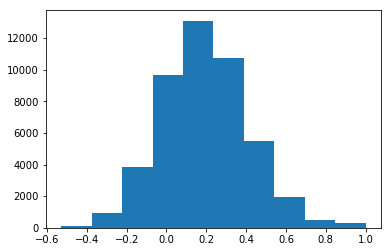

In [17]:
h = plt.hist(dists.flatten()[~np.isnan(dists.flatten())])

In [18]:
A = dists > .4

#### how reasonable is this choice?

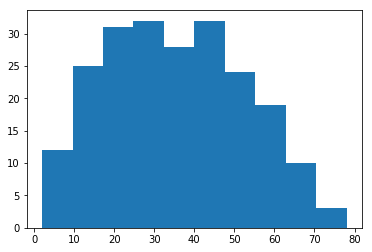

In [19]:
degrees = A.sum(axis=0)
h2 = plt.hist(degrees)

In [20]:
sum(degrees == 1), sum(degrees > 1)

(0, 216)

### some stocks have correlation > .5 with 36 other stocks?

In [21]:
ix = degrees > 60
np.array(tidy_df.ticker)[ix]

array(['AIG', 'BAC', 'COF', 'DFS', 'DOV', 'EMR', 'INTC', 'MLM', 'NTRS',
       'PFG', 'PRU', 'RHI', 'TMK', 'URI', 'VAR'], dtype=object)

In [22]:
pd.DataFrame(dists[:,ix]).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,0.273758,0.236279,0.198854,0.256362,0.266982,0.291914,0.282691,0.263254,0.229900,0.279534,0.249760,0.244228,0.223887,0.247530,0.296922
std,0.228990,0.302789,0.322328,0.271716,0.256886,0.238487,0.205953,0.225461,0.304099,0.278476,0.290839,0.249196,0.293758,0.253950,0.167635
min,-0.267073,-0.437563,-0.439721,-0.274564,-0.509233,-0.328920,-0.261150,-0.249129,-0.359930,-0.527875,-0.320209,-0.221777,-0.294774,-0.309582,-0.190592
25%,0.078963,0.007056,-0.021647,0.049390,0.067988,0.103746,0.137456,0.066899,0.004443,0.092683,0.019338,0.040549,-0.007970,0.058711,0.185976
50%,0.273868,0.254323,0.208101,0.240244,0.249129,0.292770,0.267427,0.294774,0.207753,0.289634,0.218341,0.211498,0.179965,0.259146,0.304704
75%,0.442683,0.424009,0.443510,0.450566,0.471385,0.475828,0.435148,0.437848,0.427875,0.493946,0.453179,0.434103,0.474390,0.420514,0.415244
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


seems reasonable

- code looks fine then\
- PFG = principal financial
    - likely highly correlated w their holdings

##  spectrally Embed

- recall the normalized laplacian and normal laplacian embedding and then the clustering are equivelent to the solution to minimize the following respectively:

$$RatioCut(A_1, ..., A_k) = \frac{1}{2} \sum_{k=1}^k \frac{W(A_i, A_i^c)}{|A_i|}$$ 

$$Ncut(A_1, ..., A_k) = \frac{1}{2} \sum_{k=1}^k \frac{W(A_i, A_i^c)}{vol(A_i)}$$

- Vol(Ai) = summation of the weights of the edges in this cluster = $\sum di$
    - di = degree of each node, **where degree is wrt this cluster only**
- |Ai| = number of vertices in this cluster
- $W(A_i, A_i^c)$ = summation of weights between the cluster and outside the cluster

### Normalize or nah?
- Note: the minimium to $\sum \frac{1}{|A_i|}$ and $\sum \frac{1}{vol(A_i)}$ are equal $|A_i|$s and $vol(A_i)$ respectively
- notice if use KNN or have a roughly equal degree per node, it doesn't really matter which one we use
- but if we have a high variability in our degrees, we need to decide whether we want to punish wrt number of degrees or total number of connections and their weights within a cluster
- in this context we go with the normalized laplacian
    - otherwise due to the high variablilty we'll be biased to have few clusters include some very connected nodes/stocks 

#### normed

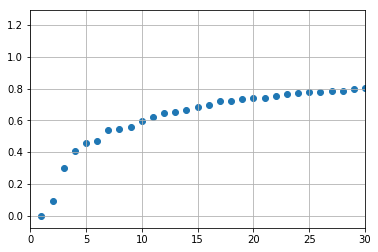

In [23]:
def spect_embed(A, normed=True):
    D = np.diag(A.sum(axis=0))
    L = D - A
    if normed:
        Dsqrt = np.diag(1/np.sqrt(A.sum(axis=0)))
        Ln = np.dot(np.dot(Dsqrt, L), Dsqrt)
    else:
        Ln=L
    lams, eigs = np.linalg.eig(Ln)
    plt.scatter(range(1, 1+len(lams)), sorted(lams))
    plt.xlim(0,30)
    plt.grid()
    return eigs, lams

eigs, lams = spect_embed(A, normed=True)

- we'll use the gap statistic to decide on the number of dimensions we want to use to represent our graph
    - 20 looks good
- notice going with 12 eigenvectors we would result in entirely disconnected clusters
    - this is the ideal case where clusters is very trivial

### looking at the 1st 2 eigenvectors

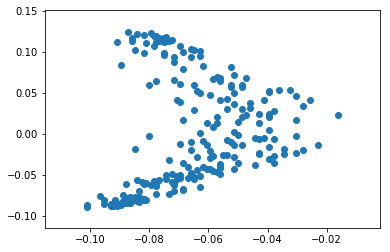

In [24]:
plt.scatter(eigs[:,0], eigs[:,1])

## lets look at lower dimensional projection of this normlaized space (tsne)
- we'll use tsne, as its good for visualizing very high dimensional spaces into 2-3 dimensions
- "It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data." http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
- Some important points to note when using tsne:
    - cluster sizes in tsne don't mean anything
    - distances between clusters don't mean anything
    - perplexity recommendation: 5-50 
        - changing this will change your plot
    - more details: https://distill.pub/2016/misread-tsne/ (great examples)

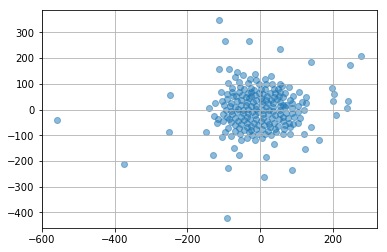

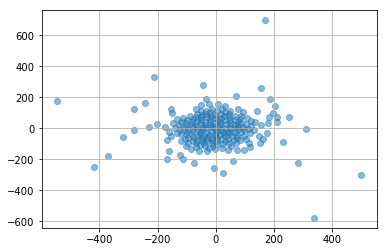

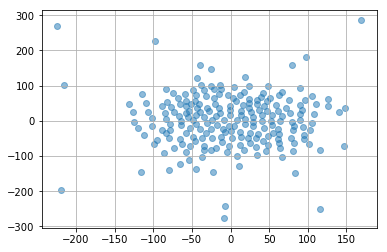

In [25]:
from sklearn.manifold import TSNE

def tsne_2dplot(df, perp=30, n_iter=1000):
    tsne = TSNE(n_components=2, perplexity=perp, n_iter=n_iter)
    embs = tsne.fit_transform(df)
    plt.scatter(embs[:,0], embs[:,1], alpha=.5)
    plt.grid()
    plt.show()
    
for i in [1000, 5000, 10000]:
    tsne_2dplot(eigs[:,:20], n_iter=i)

### kmeans
- http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- notice one nice thing about kmeans that hclust doesnt have is it easily extends to the testing set
- for spectral clustering we set k = k determined from the eigengap
    - for general kmeans set k like you would for most clustering algorithnms
    - look for a gap in WCSS = $\sum_{(x_i, x_j) \ in \ C} d(x_i, x_j)$ sum over the distances between every observation in every cluster
    - better method is to compare the differences between WCSS from your data and some uniformly generated data
        - see page 520 of ESL: https://web.stanford.edu/~hastie/Papers/ESLII.pdf
        - book is unreal btw

In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=20, max_iter=300)
kmeans.fit(eigs[:,:20])
labels = kmeans.labels_

tidy_df['clust'] = labels
clust_counts = pd.DataFrame(tidy_df.groupby(
    'clust').count().reset_index().iloc[:,1]).rename(
    columns={'ticker':'counts'}
)

print(clust_counts.sort_values(by='counts').head())
print(clust_counts.sort_values(by='counts', ascending=False).head())

    counts
10       1
13       2
11       3
12       3
17       4
    counts
9       40
6       29
1       24
19      14
3       14


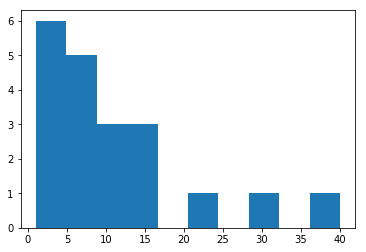

In [27]:
h = plt.hist(clust_counts.counts)

### lets intuitively validate

In [28]:
goog_row = tidy_df.ticker == 'AAPL'
goog_clust = labels[goog_row]
clustix =  labels == goog_clust
tidy_df.ticker.loc[tidy_df.index[clustix]]

1       AAPL
6       ADBE
7        ADI
10      ADSK
28       APH
70       DNB
86      FISV
95     GOOGL
111     INTC
143     MSFT
158     NVDA
Name: ticker, dtype: object

### for fun lets see how much variance we cover w different pca vectors
- http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
- **always scale before PCA!**
- although in this situation likely pretty similar means and variances across eigenvectors so probably not too important

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(eigs[:,1:20])
np.cumsum(pca.explained_variance_ratio_[:10])

array([ 0.05273309,  0.10546618,  0.15819927,  0.21093236,  0.26366545,
        0.31639854,  0.36913162,  0.42186471,  0.4745978 ,  0.52733089])

- as expected would not be a great visualixation tool
- to eval in general whether pca would be good, look at the pearson correaltions between your features
    - if theyre high pca (a linear approximator) would work well
    - whereas if pearson is low, and spearman is high, pca wouldn't work as well

## Supervised
- using the clusters we realized above, lets derive some simple features for each day, and attempt to predict returns > 0

#### first we'll bring in more data
- important not to contaminate our data w unseen biases by Feature engineering (when deriving features wrt the dependent variable) training and testing on separate data, hopefully you have enough data to do so

In [30]:
host = 'localhost'
# user='Alik_the_man'
# passwd="Im_the_smartest_person_in_this_room"
user='Brydon'
passwd="mysql_root2456"
db='fin_project'

engine = create_engine("mysql+mysqldb://{}:{}@{}:3306/{}".format(
    user, passwd, host, db
))
df = pd.read_sql("""select daily1_rets, ticker, date 
                    from hist_daily_rets0919_2017
                    where date > '2017-01-01'
                """, 
                 con=engine)

print('shape of df: {}, \n\n describe this df: \n {}, \n\n num ticks: {}'.format(
    df.shape, df.describe(), len(df.ticker.unique())))

shape of df: (22438, 3), 

 describe this df: 
         daily1_rets
count  22438.000000
mean       0.000564
std        0.013967
min       -0.176488
25%       -0.005289
50%        0.000573
75%        0.006909
max        0.234001, 

 num ticks: 219


#### features
- we'll use the day before's return for a given stock, and the average return from the day before in its cluster

In [35]:
feats = spectral_FE(df, tidy_df, dep='daily1_rets')

head check daynums:    daynum ticker        date
0       0    AAP  2017-01-03
1       0    AAP  2017-01-04
2       1    AAP  2017-01-05
3       2    AAP  2017-01-06
4       3    AAP  2017-01-09 




AttributeError: 'spectral_FE' object has no attribute 'daynum'

- here's an error message in case you want to see, you'll see them alot :)
- tips: 
    - L on a cell gives you numbers
    - stack overflow will save your life so many times, superman < helpful people on stack overflow
        - every bug that bites you probably has a solution on stack overflow

In [46]:
class spectral_FE(object):
    """
    return features derived from specrtal clusters
    """

    def __init__(self, ret_df, clusts, dep='daily1_rets', n=1):
        """
        :param ret_df:
        :param clusts: df w ticker and clust cols
        """
        self.df = ret_df
        self.dep = dep
        self.n = n
        self.df = self.df.merge(clusts[['ticker', 'clust']],
                                        how='inner', on=['ticker'])
        self.get_daynums()
        self.join_ndays_ago_on()
        self.get_clust_feats()


    def get_daynums(self):
        """
        add daynums to self
        :return:
        """
        self.df = self.df.sort_values(by=['ticker', 'date'])
        daynum = 0
        daynums = []
        tick = None
        for i in self.df.index:
            daynums.append(daynum)
            if tick is not None:
                if self.df.ticker.loc[i] == tick:
                    daynum += 1
                else:
                    daynum = 0
            tick = self.df.ticker.loc[i]
        self.df['daynum'] = daynums
        print('head check daynums: {} \n\n'.format(self.df[['daynum', 'ticker', 'date']].head()))


    def join_ndays_ago_on(self):
        """
        join on dep for n days ago
        :return:
        """
        n = self.n
        daynumpn = 'daynum_p{}'.format(n)
        self.df[daynumpn] = self.df.daynum + n
        print('shape before join: {}'.format(self.df.shape))
        self.df = self.df.merge(
            self.df[['ticker', self.dep, daynumpn, 'daynum']],
            how='inner',
            left_on = ['ticker', daynumpn],
            right_on = ['ticker', 'daynum'],
            suffixes=['', '_{}_days_ago'.format(n)]
        )
        print('shape after join: {}'.format(self.df.shape))
        print(self.df.head())

    def get_clust_feats(self, funcs=[np.mean, np.std, np.median, max, min]):
        col = '{}_{}_days_ago'.format(self.dep, self.n)
        clusts = self.df.groupby(['clust'])[col].aggregate(funcs).reset_index()
        print(clusts.head()) 
        #[self.dep].aggregate(funcs).reset_index()
        self.df = self.df.merge(clusts, on='clust', how='inner')
        
feats = spectral_FE(df, tidy_df, dep='daily1_rets')

head check daynums:    daynum ticker        date
0       0    AAP  2017-01-03
1       0    AAP  2017-01-04
2       1    AAP  2017-01-05
3       2    AAP  2017-01-06
4       3    AAP  2017-01-09 


shape before join: (22248, 6)
shape after join: (22032, 9)
   daily1_rets ticker        date  clust  daynum  daynum_p1  \
0     0.008207    AAP  2017-01-03      1       0          1   
1    -0.000698    AAP  2017-01-04      1       0          1   
2    -0.013091    AAP  2017-01-05      1       1          2   
3    -0.000589    AAP  2017-01-06      1       2          3   
4     0.002300    AAP  2017-01-09      1       3          4   

   daily1_rets_1_days_ago  daynum_p1_1_days_ago  daynum_1_days_ago  
0               -0.013091                     2                  1  
1               -0.013091                     2                  1  
2               -0.000589                     3                  2  
3                0.002300                     4                  3  
4                0.0

In [47]:
feats.df.head()

,daily1_rets,ticker,date,clust,daynum,daynum_p1,daily1_rets_1_days_ago,daynum_p1_1_days_ago,daynum_1_days_ago,mean,std,median,max,min
0,0.008207,AAP,2017-01-03,1,0,1,-0.013091,2,1,0.000892,0.012765,0.000685,0.234001,-0.085489
1,-0.000698,AAP,2017-01-04,1,0,1,-0.013091,2,1,0.000892,0.012765,0.000685,0.234001,-0.085489
2,-0.013091,AAP,2017-01-05,1,1,2,-0.000589,3,2,0.000892,0.012765,0.000685,0.234001,-0.085489
3,-0.000589,AAP,2017-01-06,1,2,3,0.002300,4,3,0.000892,0.012765,0.000685,0.234001,-0.085489
4,0.002300,AAP,2017-01-09,1,3,4,0.020657,5,4,0.000892,0.012765,0.000685,0.234001,-0.085489


In [49]:
feats.df.columns

Index(['daily1_rets', 'ticker', 'date', 'clust', 'daynum', 'daynum_p1',
       'daily1_rets_1_days_ago', 'daynum_p1_1_days_ago', 'daynum_1_days_ago',
       'mean', 'std', 'median', 'max', 'min'],
      dtype='object')

at this point I'd switch over to R


### train test
- notice this is a flawed training and testing split

In [55]:
feats.df['y'] = feats.df.daily1_rets > 0

trix = np.array([np.random.random() < .8 for i in range(len(feats.df))])
train = feats.df.loc[feats.df.index[trix]]
test = feats.df.loc[feats.df.index[~trix]]

train.shape, test.shape

((17657, 15), (4375, 15))

In [57]:
feat_cols = ['daily1_rets_1_days_ago', 'mean', 'std', 'median', 'max', 'min']

from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression()


lr1.fit(train[feat_cols], train.y)
lr1.score(train[feat_cols], train.y)

0.52047346661380756

- notice this value is close to meaningless, most of the time accuracy sucks
- and it really sucks when you dont know the underlying split
- also note the score on the training set doesnt tell you much, (ramp up the parameters on random forest, and you'll be unreal on training sets)
- for a metric of eval understand confusion matrices and what to use when
    - ex: sometimes you only care about how many of your tve predictions are correct (use precision)
    - or you only care about missing as few positives as possible (use recall / TPR)
    - https://en.wikipedia.org/wiki/Precision_and_recall
    
    
### best way to understand a binary clasifier is to plot it
- ROC or lift curve
- http://blog.yhat.com/posts/roc-curves.html

### ROC

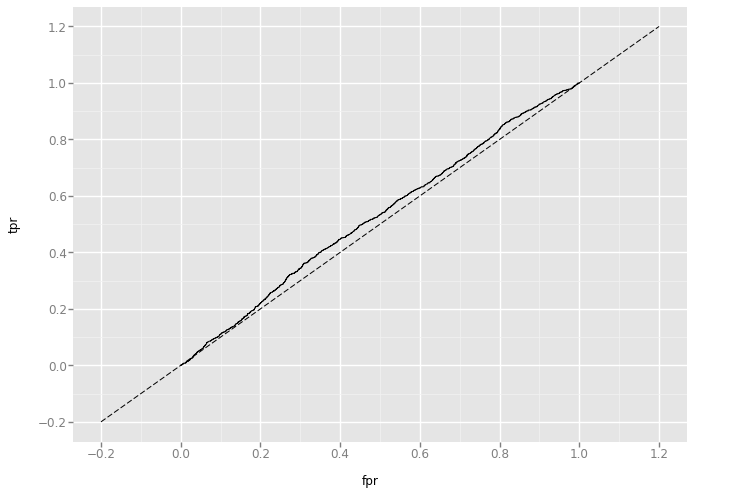

<ggplot: (-9223371894900214549)>

In [60]:
from sklearn import metrics
from ggplot import *

preds = lr1.predict_proba(test[feat_cols])
fpr, tpr, _ = metrics.roc_curve(test.y, preds[:,1])

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

## Lift

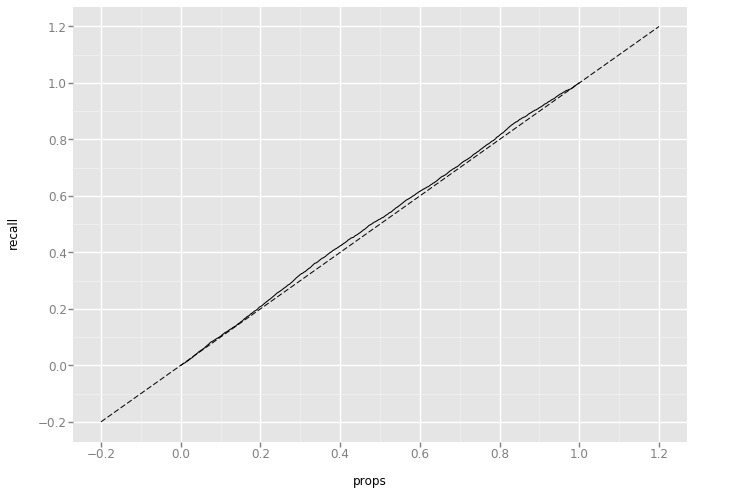

<ggplot: (-9223371894905030263)>

In [67]:
prec, recall, thresh = metrics.precision_recall_curve(test.y, preds[:,1])

df = pd.DataFrame(dict(recall=recall[::-1], props=[i / len(prec) for i in range(len(prec))]))
ggplot(df, aes(x='props', y='recall')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

### prec recall

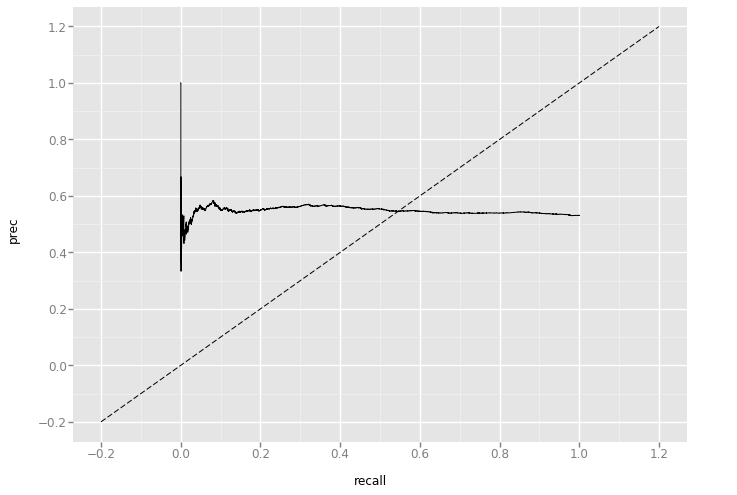

<ggplot: (141954644954)>

In [69]:
df = pd.DataFrame(dict(prec=prec, recall=recall))
ggplot(df, aes(x='recall', y='prec')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html#sklearn.metrics.precision_recall_curve

### final note:
- I would recommend making all features engineering processes into python scripts, learn to how to use python classes, This is a very iterative process and working with notebooks should be used primarily for exploration.
- This is also where python kills R, I'd recommend always feature engineering in python, and using R for EDA, and modelling 

## Also I do not recommend recommend using any of these functions for production, and am not responsible for the consequences if you do.
- hopefull thats sufficient legal cover